#### Importing required libraries

In [1]:
# install packages
install.packages(c("dplyr", "ggplot2", "tidyr", "readr", "purrr", "stringr",
                "lubridate", "data.table", "plyr", "janitor", "reshape2", "readxl"))


The downloaded binary packages are in
	/var/folders/1j/rn9q783j7sjdszqsfc6_89sw0000gn/T//RtmpBsaibr/downloaded_packages


In [2]:
# load packages
library(dplyr)
library(ggplot2)
library(tidyr)
library(readr)
library(purrr)
library(stringr)
library(lubridate)
library(data.table)
library(plyr)
library(janitor)
library(reshape2)
library(readxl)
library(mice)
library(gridExtra)
library(rlang)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union



Attaching package: 'data.table'


The following objects are masked from 'package:lubridate':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following object is masked from 'package:purrr':

    transpose


The following objects are masked from 'package:dplyr':

    between, first, last


------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

--------------------------------------------------------------------------

In [3]:
# define path we are working in
path <- "/Users/stevenschepanski/Documents/ANALYSIS/Kneipp"

In [4]:
# Read in data
sosci <- read_csv(paste0(path, "/data/Sosci.csv"))

Rows: 2480 Columns: 114
-- Column specification --------------------------------------------------------
Delimiter: ","
chr   (6): serial_ID, questionnaire_time_point, kindergarten_ID, CCQ_classif...
dbl  (91): age_of_familiarisation_child1, birth_order_child1, child1_gender,...
lgl   (3): sickdays_due_to_illness_child3, sickdays_due_to_other_reasons_chi...
dttm  (1): started
date  (5): birth_date_child1, birth_date_child2, date_of_birth_child1, date_...
time  (8): sleep_time_weekday_child1, wakeup_time_weekday_child1, sleep_time...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


# SOSCI

In [5]:
# Display the first few rows of the DataFrame using the 'head()' method
head(sosci)

serial_ID,questionnaire_time_point,started,birth_date_child1,age_of_familiarisation_child1,birth_order_child1,child1_gender,child1_weight,child1_height,vaccination_status_child1,...,CCQ_abdominal_pain_child3,CCQ_diarrhea_child3,CCQ_vomiting_child3,sickdays_last_winter2_child1,CCQ_score_child1,CCQ_score_child2,CCQ_score_child3,CCQ_classification_child1,CCQ_classification_child2,CCQ_classification_child3
<chr>,<chr>,<dttm>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
12TQZBYTL5,Vx2-2,2024-01-28 19:08:26,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,12,0,0,No_virus,NA,NA
12TQZBYTL5,V0-2,2024-01-12 18:53:24,2021-07-07,1,1,1,15,93,1,...,NA,NA,NA,NA,0,0,0,NA,NA,NA
12TQZBYTL5,Vx3-2,2024-02-02 17:56:15,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,12,0,0,No_virus,NA,NA
12TQZBYTL5,Vx5-2,2024-02-16 23:09:21,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,17,0,0,Probable_virus,NA,NA
12TQZBYTL5,Vx1-2,2024-01-20 15:16:39,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,17,0,0,No_virus,NA,NA
12TQZBYTL5,Vx6-2,2024-02-23 21:24:55,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,12,0,0,No_virus,NA,NA


In [6]:
# Get the dimensions of the DataFrame
num_rows <- nrow(sosci)
num_cols <- ncol(sosci)

# Print the dimensions in a sentence
print(sprintf("The DataFrame has %d rows and %d columns.", num_rows, num_cols))

[1] "The DataFrame has 2480 rows and 114 columns."


In [7]:
# Convert columns to factors
factor_columns <- c(
  "questionnaire_time_point", "child1_gender", "vaccination_status_child1",
  "pre_existing_diseases_child1", "chronic_diseases_child1",
  "time_outside_child1", "sport_and_club_child1",
  "cold_last_winter_child1", "bronchitis_last_winter_child1",
  "lung_inflammation_last_winter_child1", "antibiotics_last_winter_child1",
  "gastrointestinal_infections_last_winter_child1", "zipcode",
  "family_status_parents", "parent1", "parent2", "education_parent1",
  "education_parent2", "occupation_parent1", "occupation_parent2",
  "household_income", "birth_order_child1", "birth_order_child2",
  "gender_child2", "vaccination_status_child2", "pre_existing_diseases_child2",
  "chronic_diseases_child2", "time_outside_child2", "sport_and_club_child2",
  "cold_last_winter_child2", "bronchitis_last_winter_child2",
  "lung_inflammation_last_winter_child2", "antibiotics_last_winter_child2",
  "gastrointestinal_infections_last_winter_child2", "birth_order_child3",
  "CCQ_classification_child1", "CCQ_classification_child2",
  "CCQ_classification_child3"
)

sosci[factor_columns] <- lapply(sosci[factor_columns], factor)

# Convert columns to numeric
numeric_columns <- c(
  "sickdays_due_to_illness_child3", "sickdays_due_to_other_reasons_child3",
  "sickdays_last_winter2_child1"
)

sosci[numeric_columns] <- lapply(sosci[numeric_columns], as.numeric)

In [8]:
str(sosci, list.len = ncol(sosci))

spc_tbl_ [2,480 x 114] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ serial_ID                                     : chr [1:2480] "12TQZBYTL5" "12TQZBYTL5" "12TQZBYTL5" "12TQZBYTL5" ...
 $ questionnaire_time_point                      : Factor w/ 14 levels "V0","V0-2","Vx1",..: 6 2 8 12 4 14 10 14 7 6 ...
 $ started                                       : POSIXct[1:2480], format: "2024-01-28 19:08:26" "2024-01-12 18:53:24" ...
 $ birth_date_child1                             : Date[1:2480], format: NA "2021-07-07" ...
 $ age_of_familiarisation_child1                 : num [1:2480] NA 1 NA NA NA NA NA NA NA NA ...
 $ birth_order_child1                            : Factor w/ 6 levels "1","2","3","4",..: NA 1 NA NA NA NA NA NA NA NA ...
 $ child1_gender                                 : Factor w/ 3 levels "1","2","3": NA 1 NA NA NA NA NA NA NA NA ...
 $ child1_weight                                 : num [1:2480] NA 15 NA NA NA NA NA NA NA NA ...
 $ child1_height                             

In [9]:
# Check for duplicates
duplicates <- sosci %>%
  duplicated() %>%
  sum()

In [10]:
# Print the number of duplicates
print(sprintf("The DataFrame has %d duplicates.", duplicates))

[1] "The DataFrame has 0 duplicates."


In [11]:
# Descriptive statistics
summary(sosci)

  serial_ID         questionnaire_time_point    started                      
 Length:2480        V0     : 204             Min.   :2022-12-16 10:01:01.00  
 Class :character   Vx2    : 197             1st Qu.:2023-02-03 10:57:00.75  
 Mode  :character   Vx1    : 195             Median :2023-02-24 20:52:27.50  
                    Vx3    : 195             Mean   :2023-07-21 06:00:03.64  
                    Vx4    : 191             3rd Qu.:2024-02-02 12:47:57.25  
                    Vx5    : 183             Max.   :2024-03-19 11:42:39.00  
                    (Other):1315                                             
 birth_date_child1    age_of_familiarisation_child1 birth_order_child1
 Min.   :2016-01-18   Min.   :0.000                 1   : 211         
 1st Qu.:2018-02-01   1st Qu.:1.000                 2   : 103         
 Median :2018-11-19   Median :1.000                 3   :  40         
 Mean   :2018-12-30   Mean   :1.777                 4   :   6         
 3rd Qu.:2019-10-18  

## Data Preprocessing

In [12]:
# Identify columns with only NA values
na_columns <- colSums(is.na(sosci)) == nrow(sosci)

In [13]:
# Subset the dataframe excluding columns with only NA values
sosci <- sosci[, !na_columns]

# View the resulting dataframe
head(sosci)

serial_ID,questionnaire_time_point,started,birth_date_child1,age_of_familiarisation_child1,birth_order_child1,child1_gender,child1_weight,child1_height,vaccination_status_child1,...,CCQ_chest_pain_child3,CCQ_abdominal_pain_child3,CCQ_diarrhea_child3,CCQ_vomiting_child3,CCQ_score_child1,CCQ_score_child2,CCQ_score_child3,CCQ_classification_child1,CCQ_classification_child2,CCQ_classification_child3
<chr>,<fct>,<dttm>,<date>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
12TQZBYTL5,Vx2-2,2024-01-28 19:08:26,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,12,0,0,No_virus,NA,NA
12TQZBYTL5,V0-2,2024-01-12 18:53:24,2021-07-07,1,1,1,15,93,1,...,NA,NA,NA,NA,0,0,0,NA,NA,NA
12TQZBYTL5,Vx3-2,2024-02-02 17:56:15,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,12,0,0,No_virus,NA,NA
12TQZBYTL5,Vx5-2,2024-02-16 23:09:21,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,17,0,0,Probable_virus,NA,NA
12TQZBYTL5,Vx1-2,2024-01-20 15:16:39,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,17,0,0,No_virus,NA,NA
12TQZBYTL5,Vx6-2,2024-02-23 21:24:55,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,12,0,0,No_virus,NA,NA


In [14]:
sosci$started <- as.Date(sosci$started, format = "%Y-%m-%d")

In [15]:
# Merge the columns
sosci <- sosci %>%
  mutate(
    birth_date_child1 = coalesce(birth_date_child1, date_of_birth_child1),
    birth_date_child2 = coalesce(birth_date_child2, date_of_birth_child2)
  )


In [16]:
# Calculate child age based on started date
sosci <- sosci %>%
  mutate(
    child1_age = as.numeric(difftime(started, as.Date(birth_date_child1), units = "days")) / 365.25,
    child2_age = as.numeric(difftime(started, as.Date(birth_date_child2), units = "days")) / 365.25,
    child3_age = as.numeric(difftime(started, as.Date(birth_date_child3), units = "days")) / 365.25
  )

In [17]:
# Drop the unnecessary columns
sosci <- sosci %>%
  select(-birth_date_child1, -date_of_birth_child1, -birth_date_child2, -date_of_birth_child2, -birth_date_child3, -started)


In [18]:
colnames(sosci)

[1] "serial_ID"                                     
  [2] "questionnaire_time_point"                      
  [3] "age_of_familiarisation_child1"                 
  [4] "birth_order_child1"                            
  [5] "child1_gender"                                 
  [6] "child1_weight"                                 
  [7] "child1_height"                                 
  [8] "vaccination_status_child1"                     
  [9] "pre_existing_diseases_child1"                  
 [10] "chronic_diseases_child1"                       
 [11] "time_outside_child1"                           
 [12] "sport_and_club_child1"                         
 [13] "sleep_time_weekday_child1"                     
 [14] "wakeup_time_weekday_child1"                    
 [15] "sleep_time_weekend_child1"                     
 [16] "wakeup_time_weekend_child1"                    
 [17] "cold_last_winter_child1"                       
 [18] "bronchitis_last_winter_child1"                 
 [19] "lung_inflammation_last_winter_child1"          
 [20] "antibiotics_last_winter_child1"                
 [21] "gastrointestinal_infections_last_winter_child1"
 [22] "sickdays_infections_last_winter_child1"        
 [23] "additional_children"                           
 [24] "zipcode"                                       
 [25] "number_of_adults_in_household"                 
 [26] "number_of_minors_in_household"                 
 [27] "age_of_oldest_child_in_household"              
 [28] "age_of_youngest_child_in_household"            
 [29] "family_status_parents"                         
 [30] "parent1"                                       
 [31] "parent2"                                       
 [32] "education_parent1"                             
 [33] "education_parent2"                             
 [34] "occupation_parent1"                            
 [35] "occupation_parent2"                            
 [36] "household_income"                              
 [37] "age_of_kindergarten_familiarisation_child2"    
 [38] "birth_order_child2"                            
 [39] "weight_child2"                                 
 [40] "height_child2"                                 
 [41] "gender_child2"                                 
 [42] "vaccination_status_child2"                     
 [43] "pre_existing_diseases_child2"                  
 [44] "chronic_diseases_child2"                       
 [45] "time_outside_child2"                           
 [46] "sport_and_club_child2"                         
 [47] "sleep_time_weekday_child2"                     
 [48] "wakeup_time_weekday_child2"                    
 [49] "sleep_time_weekend_child2"                     
 [50] "wakeup_time_weekend_child2"                    
 [51] "cold_last_winter_child2"                       
 [52] "bronchitis_last_winter_child2"                 
 [53] "lung_inflammation_last_winter_child2"          
 [54] "antibiotics_last_winter_child2"                
 [55] "gastrointestinal_infections_last_winter_child2"
 [56] "sickdays_last_winter_child2"                   
 [57] "additional_children_child2"                    
 [58] "sickdays_due_to_illness_child1"                
 [59] "sickdays_due_to_other_reasons_child1"          
 [60] "CCQ_fever_child1"                              
 [61] "CCQ_chills_child1"                             
 [62] "CCQ_muscle_pain_child1"                        
 [63] "CCQ_watery_eyes_child1"                        
 [64] "CCQ_runny_nose_child1"                         
 [65] "CCQ_sneezing_child1"                           
 [66] "CCQ_sore_throat_child1"                        
 [67] "CCQ_cough_child1"                              
 [68] "CCQ_chest_pain_child1"                         
 [69] "CCQ_abdominal_pain_child1"                     
 [70] "CCQ_diarrhea_child1"                           
 [71] "CCQ_vomiting_child1"                           
 [72] "sickdays_due_to_illness_child2"                
 [73] "sickdays_due_to_other_reasons_child

In [19]:
#Drop columns
sosci <- sosci[, !colnames(sosci) %in% c(
    'CCQ_fever_child1', 'CCQ_chills_child1', 'CCQ_muscle_pain_child1', 'CCQ_watery_eyes_child1', 'CCQ_runny_nose_child1',
    'CCQ_sneezing_child1', 'CCQ_sore_throat_child1', 'CCQ_cough_child1', 'CCQ_chest_pain_child1', 'CCQ_abdominal_pain_child1',
    'CCQ_diarrhea_child1', 'CCQ_vomiting_child1',
    'CCQ_fever_child2', 'CCQ_chills_child2', 'CCQ_muscle_pain_child2', 'CCQ_watery_eyes_child2', 'CCQ_runny_nose_child2',
    'CCQ_sneezing_child2', 'CCQ_sore_throat_child2', 'CCQ_cough_child2', 'CCQ_chest_pain_child2', 'CCQ_abdominal_pain_child2',
    'CCQ_diarrhea_child2', 'CCQ_vomiting_child2',
    'CCQ_fever_child3', 'CCQ_chills_child3', 'CCQ_muscle_pain_child3', 'CCQ_watery_eyes_child3', 'CCQ_runny_nose_child3',
    'CCQ_sneezing_child3', 'CCQ_sore_throat_child3', 'CCQ_cough_child3', 'CCQ_chest_pain_child3', 'CCQ_abdominal_pain_child3',
    'CCQ_diarrhea_child3', 'CCQ_vomiting_child3'
)]


In [20]:
# renaming columns for clarity
colnames(sosci) <- gsub("child1_gender", "gender_child1", colnames(sosci))
colnames(sosci) <- gsub("child1_weight", "weight_child1", colnames(sosci))
colnames(sosci) <- gsub("child1_height", "height_child1", colnames(sosci))
colnames(sosci) <- gsub("child1_age", "age_child1", colnames(sosci))
colnames(sosci) <- gsub("child2_age", "age_child2", colnames(sosci))
colnames(sosci) <- gsub("child3_age", "age_child3", colnames(sosci))

In [21]:
# Define parent-specific columns
parent_columns <- c('serial_ID', 'questionnaire_time_point', 'additional_children', 'zipcode',
                    'number_of_adults_in_household', 'number_of_minors_in_household', 'age_of_oldest_child_in_household',
                    'age_of_youngest_child_in_household', 'family_status_parents', 'parent1', 'parent2',
                    'education_parent1', 'education_parent2', 'occupation_parent1', 'occupation_parent2',
                    'household_income', 'kindergarten_ID')


In [22]:
# Identify all columns
all_columns <- names(sosci)

# Identify child-specific columns
child_columns <- setdiff(all_columns, parent_columns)

In [23]:
# Reshape the dataframe to long format
sosci_melted <- melt(sosci, id.vars = parent_columns, measure.vars = child_columns,
                     variable.name = "variable", value.name = "value")

Warning message:
"attributes are not identical across measure variables; they will be dropped"


In [24]:
# Extract child information from the variable names
sosci_melted <- sosci_melted %>%
  mutate(child = sub(".*_(child[123])", "\\1", variable),
         variable = sub("_(child[123])", "", variable))

In [25]:
# Remove duplicates by selecting the first occurrence of each group
sosci_melted <- sosci_melted %>%
  group_by(serial_ID, questionnaire_time_point, additional_children, zipcode,
           number_of_adults_in_household, number_of_minors_in_household,
           age_of_oldest_child_in_household, age_of_youngest_child_in_household,
           family_status_parents, parent1, parent2, education_parent1,
           education_parent2, occupation_parent1, occupation_parent2,
           household_income, kindergarten_ID, child, variable) %>%
  filter(row_number() == 1) %>%
  ungroup()

In [26]:
# Spread the dataframe back to wide format
sosci_clean <- sosci_melted %>%
  pivot_wider(names_from = variable, values_from = value, names_repair = "unique")

# Convert appropriate columns back to their original data types where necessary
sosci_clean <- sosci_clean %>%
  mutate(across(where(is.character), as.numeric, .names = "numeric_{col}"), .keep = "unused")

# Verify the changes
sapply(sosci_clean, class)

New names:
* `additional_children` -> `additional_children...3`
* `additional_children` -> `additional_children...41`


serial_ID                questionnaire_time_point 
                            "character"                                "factor" 
                additional_children...3                                 zipcode 
                              "numeric"                                "factor" 
          number_of_adults_in_household           number_of_minors_in_household 
                              "numeric"                               "numeric" 
       age_of_oldest_child_in_household      age_of_youngest_child_in_household 
                              "numeric"                               "numeric" 
                  family_status_parents                                 parent1 
                               "factor"                                "factor" 
                                parent2                       education_parent1 
                               "factor"                                "factor" 
                      education_parent2                      occupation_parent1 
                               "factor"                                "factor" 
                     occupation_parent2                        household_income 
                               "factor"                                "factor" 
                        kindergarten_ID                                   child 
                            "character"                             "character" 
                 age_of_familiarisation                             birth_order 
                            "character"                             "character" 
                                 gender                                  weight 
                            "character"                             "character" 
                                 height                      vaccination_status 
                            "character"                             "character" 
                  pre_existing_diseases                        chronic_diseases 
                            "character"                             "character" 
                           time_outside                          sport_and_club 
                            "character"                             "character" 
                     sleep_time_weekday                     wakeup_time_weekday 
                            "character"                             "character" 
                     sleep_time_weekend                     wakeup_time_weekend 
                            "character"                             "character" 
                       cold_last_winter                  bronchitis_last_winter 
                            "character"                             "character" 
          lung_inflammation_last_winter                 antibiotics_last_winter 
                            "character"                             "character" 
gastrointestinal_infections_last_winter         sickdays_infections_last_winter 
                            "character"                             "character" 
    age_of_kindergarten_familiarisation                    sickdays_last_winter 
                            "character"                             "character" 
               additional_children...41                 sickdays_due_to_illness 
                            "character"                             "character" 
          sickdays_due_to_other_reasons                               CCQ_score 
                            "character"                             "character" 
                     CCQ_classification                                     age 
                            "character"                             "character" 
                                  .keep 
                            "character"

In [27]:
# Define the columns that contain times
time_columns <- c('sleep_time_weekday', 'wakeup_time_weekday', 'sleep_time_weekend', 'wakeup_time_weekend')

# Function to convert seconds to HH:MM:SS format
seconds_to_hms <- function(seconds) {
  if (is.na(seconds) || seconds == "NA") {
    return(NA)
  }
  seconds <- as.numeric(seconds)
  h <- floor(seconds / 3600)
  m <- floor((seconds %% 3600) / 60)
  s <- seconds %% 60
  sprintf("%02d:%02d:%02d", h, m, s)
}

# Apply the conversion to the time columns
sosci_clean[time_columns] <- lapply(sosci_clean[time_columns], function(col) sapply(col, seconds_to_hms))

In [28]:
str(sosci_clean)

tibble [7,278 x 47] (S3: tbl_df/tbl/data.frame)
 $ serial_ID                              : chr [1:7278] "12TQZBYTL5" "12TQZBYTL5" "12TQZBYTL5" "12TQZBYTL5" ...
 $ questionnaire_time_point               : Factor w/ 14 levels "V0","V0-2","Vx1",..: 6 2 8 12 4 14 10 14 7 6 ...
 $ additional_children...3                : num [1:7278] NA 1 NA NA NA NA NA NA NA NA ...
 $ zipcode                                : Factor w/ 44 levels "1","4","6","8",..: NA 4 NA NA NA NA NA NA NA NA ...
 $ number_of_adults_in_household          : num [1:7278] NA 2 NA NA NA NA NA NA NA NA ...
 $ number_of_minors_in_household          : num [1:7278] NA 1 NA NA NA NA NA NA NA NA ...
 $ age_of_oldest_child_in_household       : num [1:7278] NA NA NA NA NA NA NA NA NA NA ...
 $ age_of_youngest_child_in_household     : num [1:7278] NA NA NA NA NA NA NA NA NA NA ...
 $ family_status_parents                  : Factor w/ 6 levels "1","2","3","4",..: NA 2 NA NA NA NA NA NA NA NA ...
 $ parent1                              

In [29]:
library(lubridate)

sosci_clean <- sosci_clean %>%
  # Convert kindergarten_ID and child to factors
  mutate(
    kindergarten_ID = as.factor(kindergarten_ID),
    child = as.factor(child),
    
    # Convert age_of_familiarisation to numeric
    age_of_familiarisation = as.numeric(age_of_familiarisation),
    
    # Convert birth_order, gender, vaccination_status, pre_existing_diseases, and chronic_diseases to factors
    birth_order = as.factor(birth_order),
    gender = as.factor(gender),
    vaccination_status = as.factor(vaccination_status),
    pre_existing_diseases = as.factor(pre_existing_diseases),
    chronic_diseases = as.factor(chronic_diseases),
    
    # Convert weight and height to numeric
    weight = as.numeric(weight),
    height = as.numeric(height),
    
    # Convert time_outside and sport_and_club to factors
    time_outside = as.factor(time_outside),
    sport_and_club = as.factor(sport_and_club),
    
    # Convert sleep_time_weekday and wakeup_time_weekday to POSIXct
    sleep_time_weekday = parse_date_time(sleep_time_weekday, orders = "HMS"),
    wakeup_time_weekday = parse_date_time(wakeup_time_weekday, orders = "HMS"),
    
    # Convert sleep_time_weekend and wakeup_time_weekend to POSIXct
    sleep_time_weekend = parse_date_time(sleep_time_weekend, orders = "HMS"),
    wakeup_time_weekend = parse_date_time(wakeup_time_weekend, orders = "HMS"),
    
    # Convert cold_last_winter, bronchitis_last_winter, lung_inflammation_last_winter, antibiotics_last_winter, gastrointestinal_infections_last_winter, sickdays_infections_last_winter to numeric
    cold_last_winter = as.numeric(cold_last_winter),
    bronchitis_last_winter = as.numeric(bronchitis_last_winter),
    lung_inflammation_last_winter = as.numeric(lung_inflammation_last_winter),
    antibiotics_last_winter = as.numeric(antibiotics_last_winter),
    gastrointestinal_infections_last_winter = as.numeric(gastrointestinal_infections_last_winter),
    sickdays_infections_last_winter = as.numeric(sickdays_infections_last_winter),
    
    # Convert age_of_kindergarten_familiarisation, sickdays_last_winter, sickdays_due_to_illness, sickdays_due_to_other_reasons, CCQ_score, age to numeric
    age_of_kindergarten_familiarisation = as.numeric(age_of_kindergarten_familiarisation),
    sickdays_last_winter = as.numeric(sickdays_last_winter),
    sickdays_due_to_illness = as.numeric(sickdays_due_to_illness),
    sickdays_due_to_other_reasons = as.numeric(sickdays_due_to_other_reasons),
    CCQ_score = as.numeric(CCQ_score),
    age = as.numeric(age),
    
    # Convert CCQ_classification to factor
    CCQ_classification = as.factor(CCQ_classification)
  )

# Remove the .keep column if it is not needed
sosci_clean <- sosci_clean %>% select(-.keep)

In [30]:
str(sosci_clean)

tibble [7,278 x 46] (S3: tbl_df/tbl/data.frame)
 $ serial_ID                              : chr [1:7278] "12TQZBYTL5" "12TQZBYTL5" "12TQZBYTL5" "12TQZBYTL5" ...
 $ questionnaire_time_point               : Factor w/ 14 levels "V0","V0-2","Vx1",..: 6 2 8 12 4 14 10 14 7 6 ...
 $ additional_children...3                : num [1:7278] NA 1 NA NA NA NA NA NA NA NA ...
 $ zipcode                                : Factor w/ 44 levels "1","4","6","8",..: NA 4 NA NA NA NA NA NA NA NA ...
 $ number_of_adults_in_household          : num [1:7278] NA 2 NA NA NA NA NA NA NA NA ...
 $ number_of_minors_in_household          : num [1:7278] NA 1 NA NA NA NA NA NA NA NA ...
 $ age_of_oldest_child_in_household       : num [1:7278] NA NA NA NA NA NA NA NA NA NA ...
 $ age_of_youngest_child_in_household     : num [1:7278] NA NA NA NA NA NA NA NA NA NA ...
 $ family_status_parents                  : Factor w/ 6 levels "1","2","3","4",..: NA 2 NA NA NA NA NA NA NA NA ...
 $ parent1                              

In [31]:
sosci_clean <- sosci_clean %>%
  # Recode questionnaire_time_point
  mutate(
    questionnaire_time_point = recode(questionnaire_time_point,
      'V0' = 'Baseline',
      'V0-2' = 'Follow',
      'Vx1' = 'Baseline_week1',
      'Vx1-2' = 'Follow_week1',
      'Vx2' = 'Baseline_week2',
      'Vx2-2' = 'Follow_week2',
      'Vx3' = 'Baseline_week3',
      'Vx3-2' = 'Follow_week3',
      'Vx4' = 'Baseline_week4',
      'Vx4-2' = 'Follow_week4',
      'Vx5' = 'Baseline_week5',
      'Vx5-2' = 'Follow_week5',
      'Vx6' = 'Baseline_week6',
      'Vx6-2' = 'Follow_week6'
    ),
    
    # Create Group variable based on kindergarten_ID
    Group = recode(kindergarten_ID,
      'MTB1' = 'Kneipp',
      'MTB2' = 'Control',
      'MTB3' = 'Control',
      'PBB1' = 'Kneipp',
      'PBB2' = 'Control',
      'RGB1' = 'Kneipp',
      'RGB2' = 'Control',
      'Admin' = 'NA'
    )
  )

In [32]:
head(sosci_clean)

serial_ID,questionnaire_time_point,additional_children...3,zipcode,number_of_adults_in_household,number_of_minors_in_household,age_of_oldest_child_in_household,age_of_youngest_child_in_household,family_status_parents,parent1,...,sickdays_infections_last_winter,age_of_kindergarten_familiarisation,sickdays_last_winter,additional_children...41,sickdays_due_to_illness,sickdays_due_to_other_reasons,CCQ_score,CCQ_classification,age,Group
<chr>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,...,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>
12TQZBYTL5,Follow_week2,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,12,No_virus,NA,Control
12TQZBYTL5,Follow,1,8,2,1,NA,NA,2,1,...,NA,NA,NA,NA,NA,NA,0,NA,2.516085,Control
12TQZBYTL5,Follow_week3,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,12,No_virus,NA,Control
12TQZBYTL5,Follow_week5,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,2,NA,17,Probable_virus,NA,Control
12TQZBYTL5,Follow_week1,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,2,NA,17,No_virus,NA,Control
12TQZBYTL5,Follow_week6,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,12,No_virus,NA,Control


In [33]:
colnames(sosci_clean)

[1] "serial_ID"                              
 [2] "questionnaire_time_point"               
 [3] "additional_children...3"                
 [4] "zipcode"                                
 [5] "number_of_adults_in_household"          
 [6] "number_of_minors_in_household"          
 [7] "age_of_oldest_child_in_household"       
 [8] "age_of_youngest_child_in_household"     
 [9] "family_status_parents"                  
[10] "parent1"                                
[11] "parent2"                                
[12] "education_parent1"                      
[13] "education_parent2"                      
[14] "occupation_parent1"                     
[15] "occupation_parent2"                     
[16] "household_income"                       
[17] "kindergarten_ID"                        
[18] "child"                                  
[19] "age_of_familiarisation"                 
[20] "birth_order"                            
[21] "gender"                                 
[22] "weight"                                 
[23] "height"                                 
[24] "vaccination_status"                     
[25] "pre_existing_diseases"                  
[26] "chronic_diseases"                       
[27] "time_outside"                           
[28] "sport_and_club"                         
[29] "sleep_time_weekday"                     
[30] "wakeup_time_weekday"                    
[31] "sleep_time_weekend"                     
[32] "wakeup_time_weekend"                    
[33] "cold_last_winter"                       
[34] "bronchitis_last_winter"                 
[35] "lung_inflammation_last_winter"          
[36] "antibiotics_last_winter"                
[37] "gastrointestinal_infections_last_winter"
[38] "sickdays_infections_last_winter"        
[39] "age_of_kindergarten_familiarisation"    
[40] "sickdays_last_winter"                   
[41] "additional_children...41"               
[42] "sickdays_due_to_illness"                
[43] "sickdays_due_to_other_reasons"          
[44] "CCQ_score"                              
[45] "CCQ_classification"                     
[46] "age"                                    
[47] "Group"

In [34]:
# Get the dimensions of the DataFrame
num_rows <- nrow(sosci_clean)
num_cols <- ncol(sosci_clean)

# Print the dimensions in a sentence
print(sprintf("The DataFrame has %d rows and %d columns.", num_rows, num_cols))

[1] "The DataFrame has 7278 rows and 47 columns."


In [35]:
duplicates <- sosci_clean %>%
  duplicated() %>%
  sum()

# Print the number of duplicates
print(sprintf("The DataFrame has %d duplicates.", duplicates))

[1] "The DataFrame has 0 duplicates."


In [36]:
# Descriptive statistics
summary(sosci_clean)

  serial_ID           questionnaire_time_point additional_children...3
 Length:7278        Baseline      : 603        Min.   :1.0            
 Class :character   Baseline_week5: 549        1st Qu.:1.0            
 Mode  :character   Baseline_week1: 546        Median :1.0            
                    Baseline_week2: 546        Mean   :1.1            
                    Baseline_week4: 546        3rd Qu.:1.0            
                    Baseline_week3: 543        Max.   :2.0            
                    (Other)       :3945        NA's   :6195           
    zipcode     number_of_adults_in_household number_of_minors_in_household
 191    : 114   Min.   :1.000                 Min.   :1.000                
 53     :  54   1st Qu.:2.000                 1st Qu.:1.000                
 27     :  45   Median :2.000                 Median :2.000                
 21     :  36   Mean   :1.941                 Mean   :1.846                
 56     :  33   3rd Qu.:2.000                 3rd Qu

In [37]:
install.packages(c("visdat", "naniar"))


The downloaded binary packages are in
	/var/folders/1j/rn9q783j7sjdszqsfc6_89sw0000gn/T//RtmpBsaibr/downloaded_packages


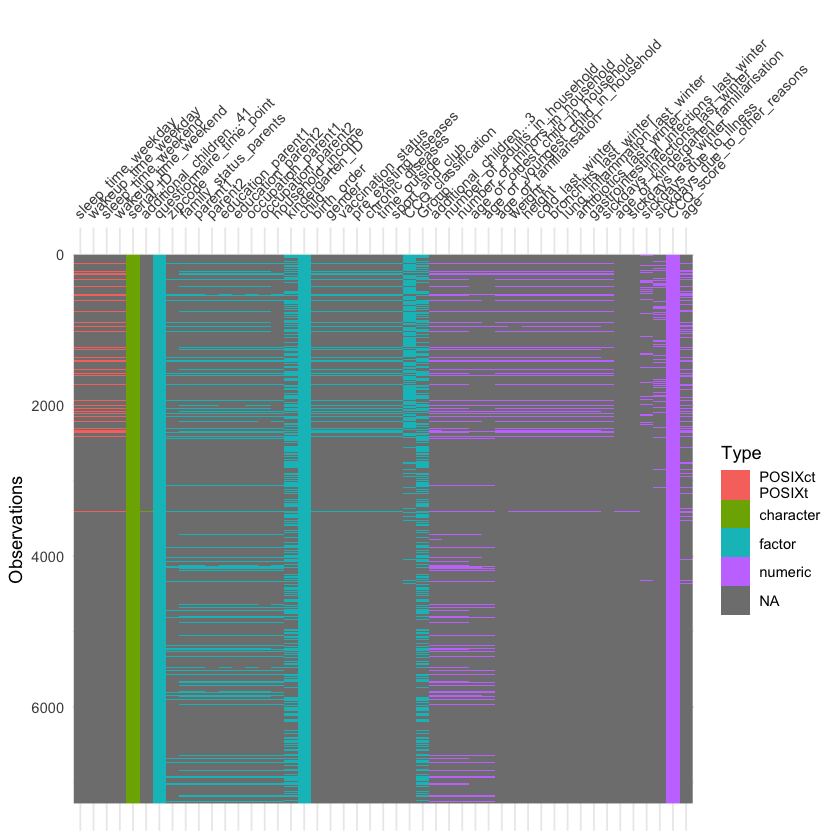

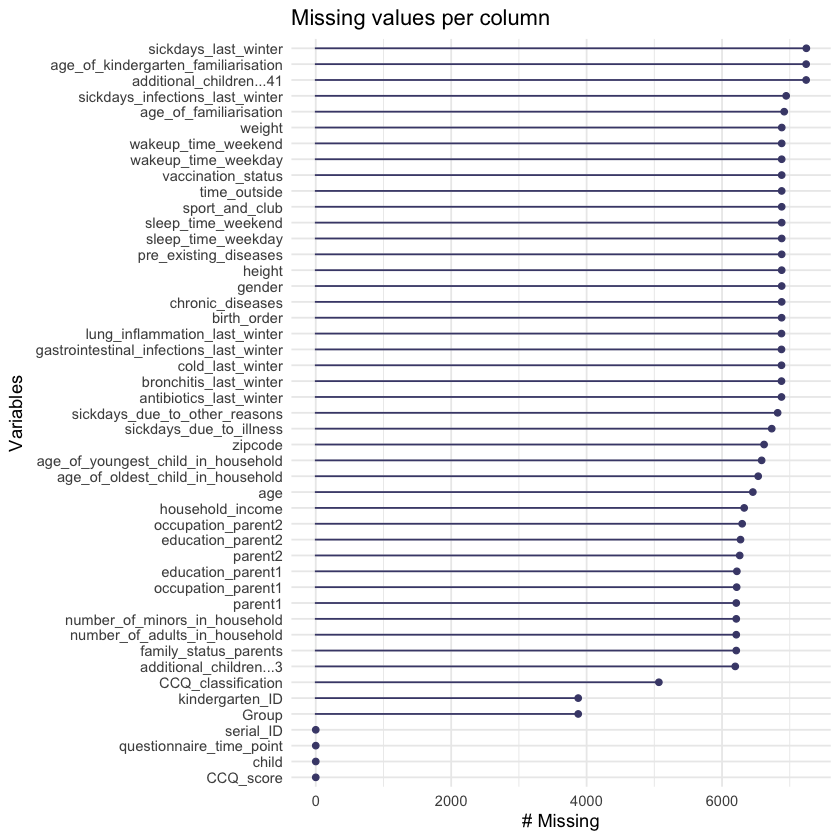

In [38]:
# Load required packages
library(visdat)
library(naniar)

# Visualize the pattern of missing data
vis_dat(sosci_clean)

# Alternatively, using naniar
gg_miss_var(sosci_clean) + labs(title = "Missing values per column")


In [39]:
# Remove rows where Group is NA
sosci_clean <- sosci_clean %>% filter(!is.na(Group))

# Verify the removal
table(is.na(sosci_clean$Group))


FALSE 
 3402 

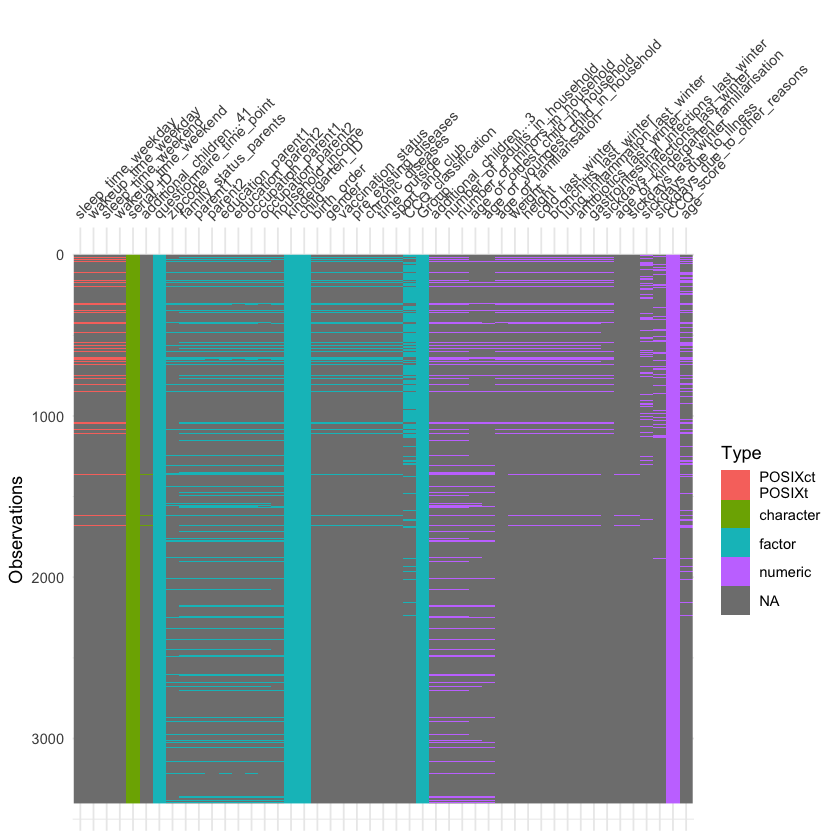

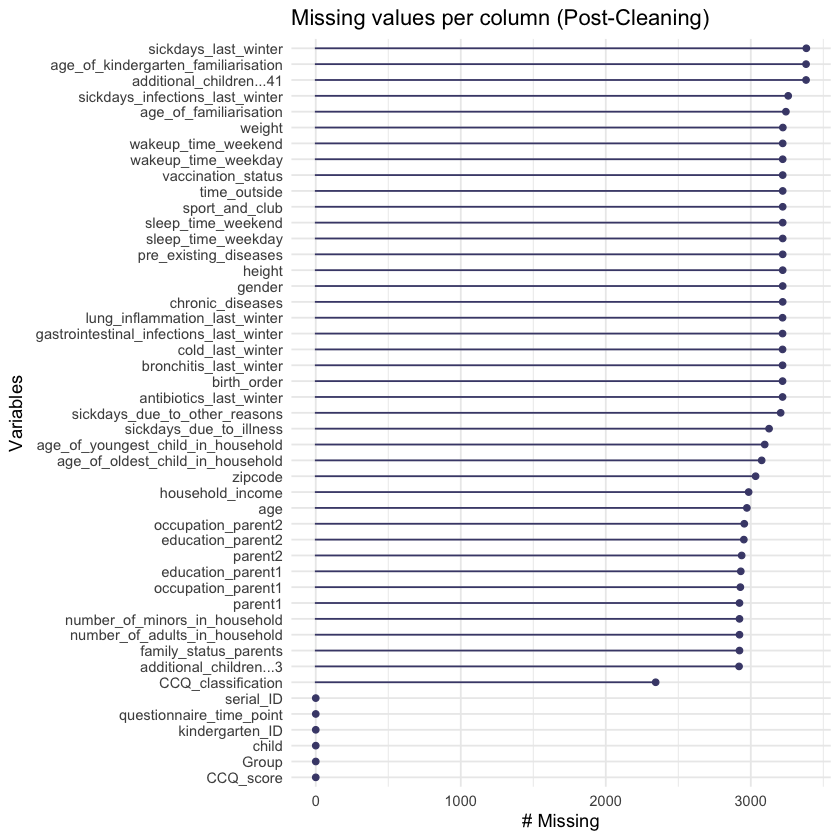

In [40]:
# Visualize the pattern of missing data after cleaning
vis_dat(sosci_clean)

# Alternatively, using naniar
gg_miss_var(sosci_clean) + labs(title = "Missing values per column (Post-Cleaning)")


### checking if the data is similar

In [41]:
# frequencies of gender levels
table(sosci_clean$gender)

# frequencies of vaccination_status levels
table(sosci_clean$vaccination_status)

# mean weight, height, and age per gender
sosci_clean %>%
  dplyr::summarise(
    mean_weight = mean(weight, na.rm = TRUE),
    mean_height = mean(height, na.rm = TRUE),
    mean_age = mean(age, na.rm = TRUE)
  )


 1  2  3 
97 85  0 


  1   2   3 
164  16   2 

mean_weight,mean_height,mean_age
<dbl>,<dbl>,<dbl>
17.60221,106.1538,4.400818


In [42]:
sosci %>%
  mutate(height_child_avg = (height_child1 + height_child2) / 2) %>%
  dplyr::summarise(mean_height_child = mean(height_child_avg, na.rm = TRUE))

mean_height_child
<dbl>
105.5833


I checked whether the reshaped and the original data frame show the same data. They do, so I can continue to do the analysis.

## ITT
## In-Depth Exploratory Data Analysis

In the Exploratory Data Analysis (EDA), my focus will be on examining the data distribution, investigating the correlation among features, and exploring the connection between the features and the target variable. I will commence by scrutinizing the data distribution, and subsequently, I will delve into the relationship between the target and the independent variables.

In [43]:
# exclude kindergarten_ID = MTB3
sosci_clean <- sosci_clean %>%
    filter(kindergarten_ID != "MTB3")

In [44]:
# Step 1: Filter to keep only relevant columns and rows
filtered_data <- sosci_clean %>%
  filter(questionnaire_time_point %in% c("Follow", "Follow_week1", "Follow_week2", "Follow_week3", "Follow_week4", "Follow_week5", "Follow_week6"))

In [45]:
filtered_data <- filtered_data %>%
  mutate(serial_ID = as.character(serial_ID))

In [46]:
# Step 2: Calculate the mean CCQ_score for each serial_ID across the 6 weeks
mean_scores <- filtered_data %>%
  filter(questionnaire_time_point != "Follow") %>%
  select(serial_ID, questionnaire_time_point, CCQ_score, Group) %>%
  group_by(serial_ID) %>%
  dplyr::summarise(mean_CCQ_score = mean(CCQ_score, na.rm = TRUE))

In [47]:
# Step 3: Assign the mean CCQ_score to the row where questionnaire_time_point = Follow
updated_data <- filtered_data %>%
  left_join(mean_scores, by = "serial_ID") %>%
  mutate(CCQ_score = if_else(questionnaire_time_point == "Follow", mean_CCQ_score, CCQ_score))


In [48]:
# Step 4: Keep only the Follow time point rows
final_data <- updated_data %>%
  filter(questionnaire_time_point == "Follow")

In [49]:
# Step 5: Remove the questionnaire_time_point column
final_data <- final_data %>%
  select(-questionnaire_time_point, -mean_CCQ_score)

# Print the final data
head(final_data)

serial_ID,additional_children...3,zipcode,number_of_adults_in_household,number_of_minors_in_household,age_of_oldest_child_in_household,age_of_youngest_child_in_household,family_status_parents,parent1,parent2,...,sickdays_infections_last_winter,age_of_kindergarten_familiarisation,sickdays_last_winter,additional_children...41,sickdays_due_to_illness,sickdays_due_to_other_reasons,CCQ_score,CCQ_classification,age,Group
<chr>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,...,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>
12TQZBYTL5,1,8,2,1,NA,NA,2,1,2,...,NA,NA,NA,NA,NA,NA,4.555556,NA,2.516085,Control
14XUXCQFM3,1,130,2,2,5,2,1,1,2,...,NA,NA,NA,NA,NA,NA,4.055556,NA,5.262149,Control
171KGMFMMF,1,NA,2,1,NA,NA,1,1,2,...,1,NA,NA,NA,NA,NA,3.333333,NA,4.134155,Kneipp
1KGW5NWVQW,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,0.000000,NA,NA,Kneipp
1QQ55RFXLT,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,0.000000,NA,NA,Kneipp
1SXEBNF5YZ,1,151,2,2,6,2,1,1,2,...,1,NA,NA,NA,NA,NA,4.000000,NA,6.099932,Control


In [114]:
head(sosci_clean)

serial_ID,questionnaire_time_point,additional_children...3,zipcode,number_of_adults_in_household,number_of_minors_in_household,age_of_oldest_child_in_household,age_of_youngest_child_in_household,family_status_parents,parent1,...,sickdays_infections_last_winter,age_of_kindergarten_familiarisation,sickdays_last_winter,additional_children...41,sickdays_due_to_illness,sickdays_due_to_other_reasons,CCQ_score,CCQ_classification,age,Group
<chr>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,...,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>
12TQZBYTL5,Follow_week2,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,12,No_virus,NA,Control
12TQZBYTL5,Follow,1,8,2,1,NA,NA,2,1,...,NA,NA,NA,NA,NA,NA,0,NA,2.516085,Control
12TQZBYTL5,Follow_week3,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,12,No_virus,NA,Control
12TQZBYTL5,Follow_week5,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,2,NA,17,Probable_virus,NA,Control
12TQZBYTL5,Follow_week1,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,2,NA,17,No_virus,NA,Control
12TQZBYTL5,Follow_week6,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,12,No_virus,NA,Control


In [149]:
# Ensure 'questionnaire_time_point' is a factor and ordered correctly
sosci_clean <- sosci_clean %>%
  mutate(questionnaire_time_point = factor(questionnaire_time_point, levels = c("Follow_week1", "Follow_week2", "Follow_week3", "Follow_week4", "Follow_week5", "Follow_week6", "Follow")))

# Filter and prepare data
filtered_data <- sosci_clean %>%
  filter(Group %in% c("Kneipp", "Control")) %>%
  mutate(CCQ_score = as.numeric(CCQ_score))

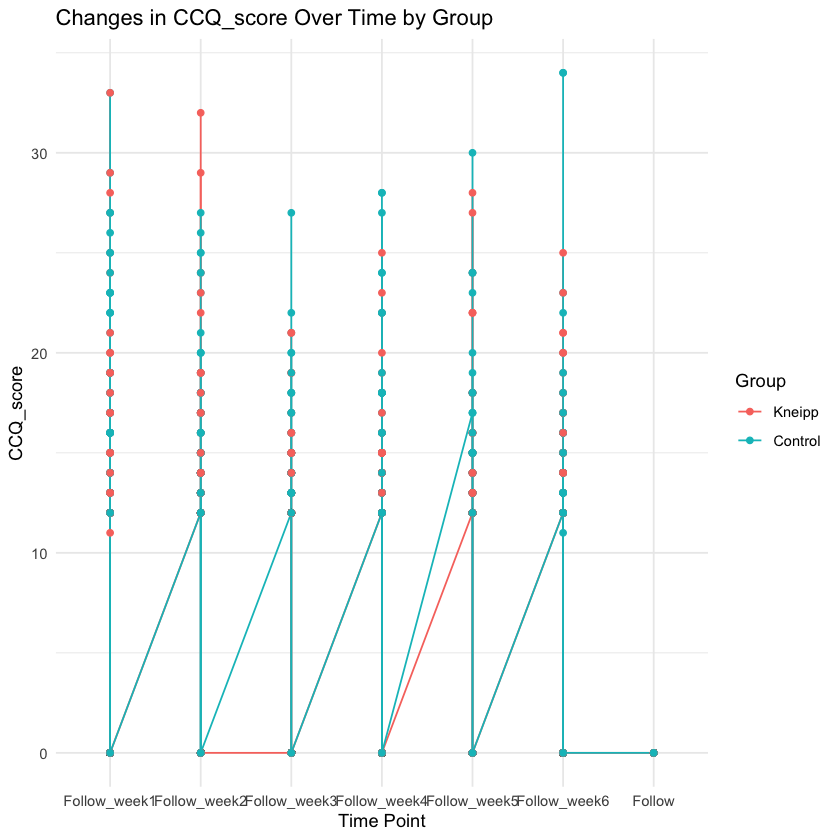

In [150]:
# Line plot for CCQ_score over time by group
line_plot <- ggplot(filtered_data, aes(x = questionnaire_time_point, y = CCQ_score, color = Group, group = Group)) +
  geom_line() +
  geom_point() +
  labs(title = "Changes in CCQ_score Over Time by Group",
       x = "Time Point",
       y = "CCQ_score",
       color = "Group") +
  theme_minimal()

print(line_plot)

In [151]:
# Prepare data for pie charts, excluding NA values for CCQ_classification
ccq_classification_data <- filtered_data %>%
  filter(!is.na(CCQ_classification)) %>%
  group_by(Group, questionnaire_time_point, CCQ_classification) %>%
  dplyr::summarise(count = n(), .groups = 'drop') %>%
  ungroup() %>%
  complete(Group, questionnaire_time_point, CCQ_classification, fill = list(count = 0))


In [156]:
# Function to create pie charts for each time point and group
create_pie_chart <- function(data, time_point) {
  ggplot(data, aes(x = "", y = count, fill = CCQ_classification)) +
    geom_bar(stat = "identity", width = 1) +
    coord_polar("y") +
    facet_wrap(~ Group) +
    labs(title = paste("CCQ Classification Distribution at", time_point),
         fill = "CCQ Classification") +
    theme_minimal() +
    theme(axis.title.x = element_blank(),
          axis.title.y = element_blank(),
          axis.text.x = element_blank(),
          axis.ticks = element_blank())
}

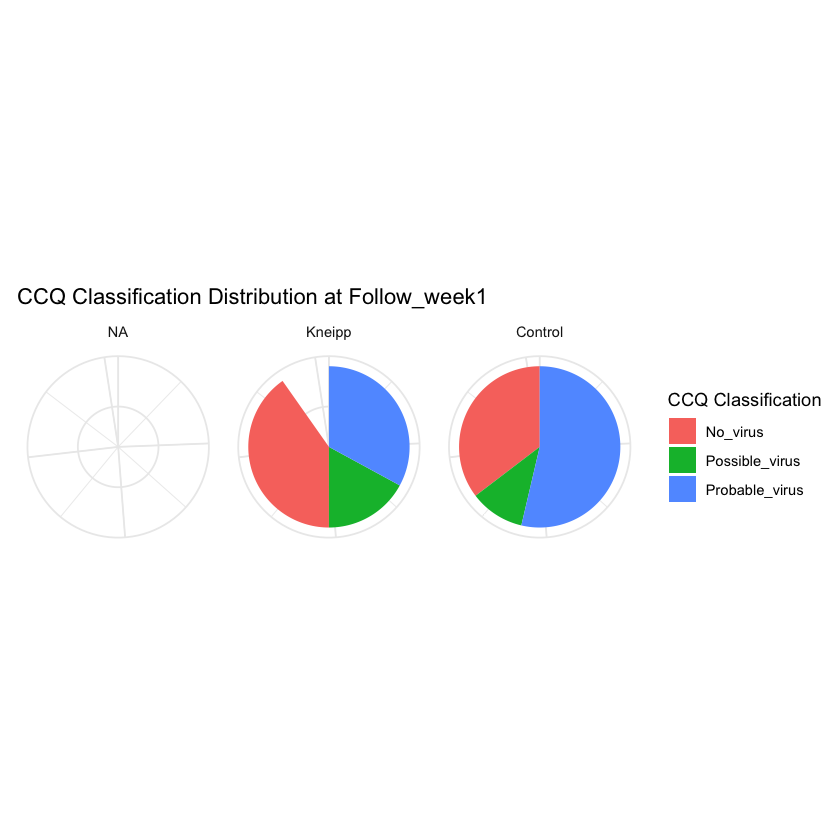

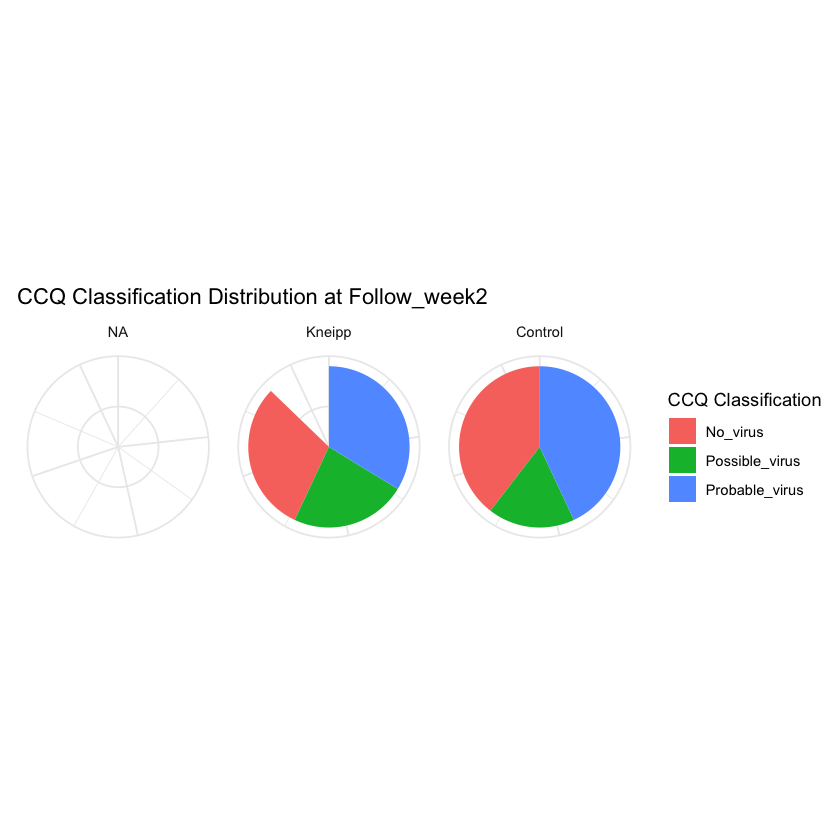

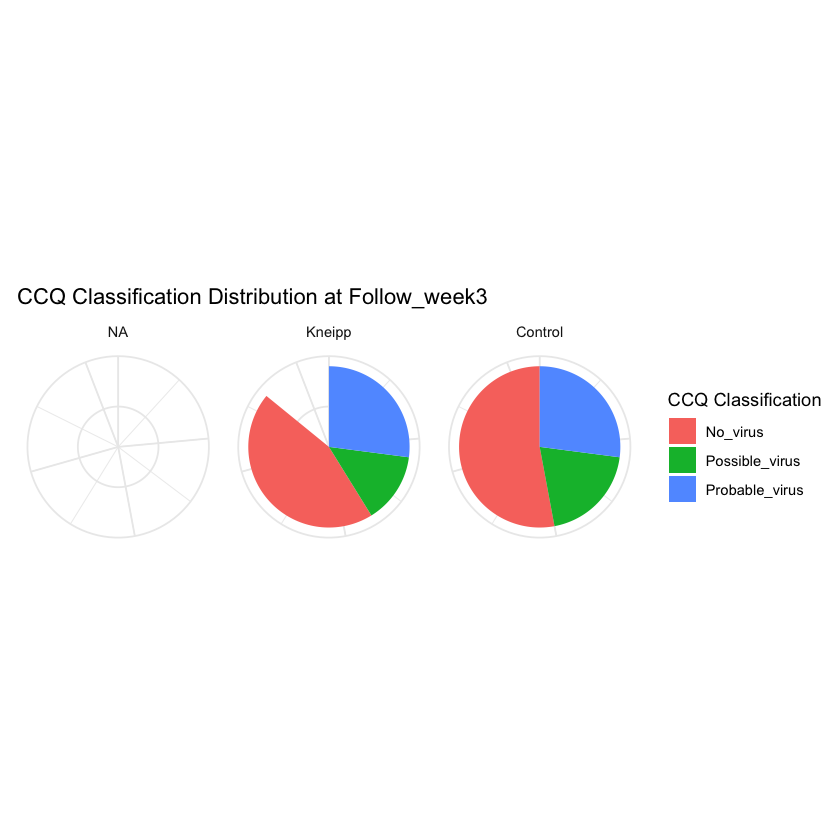

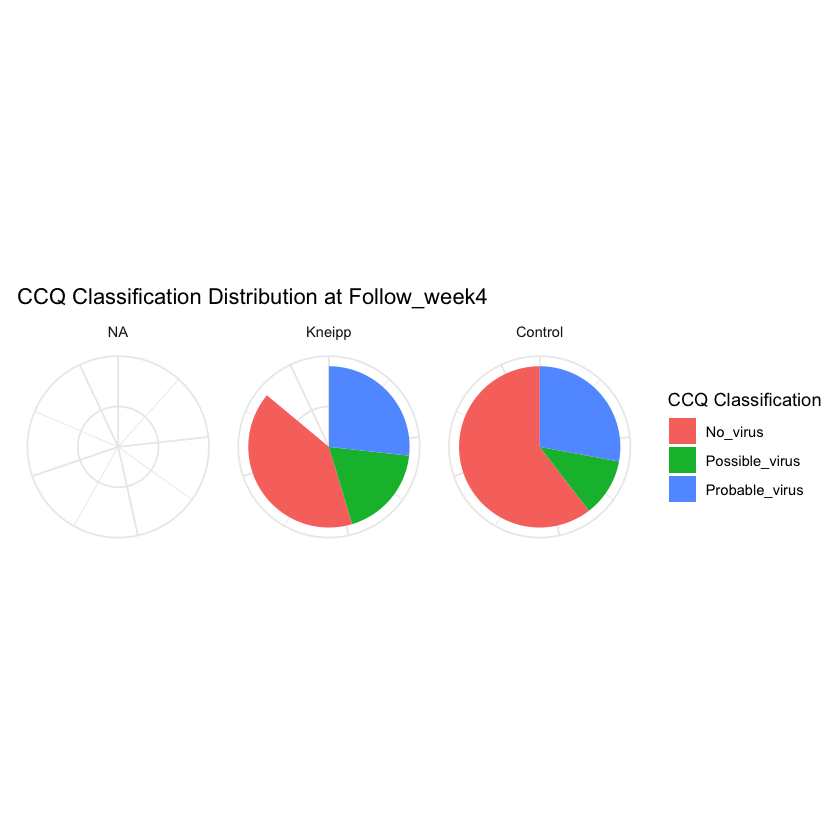

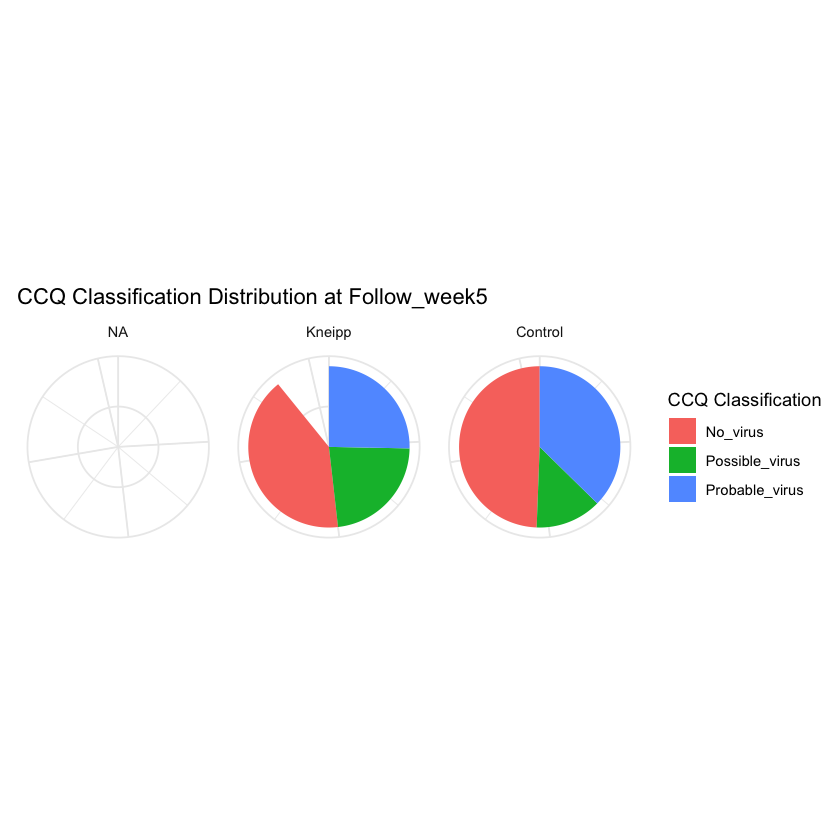

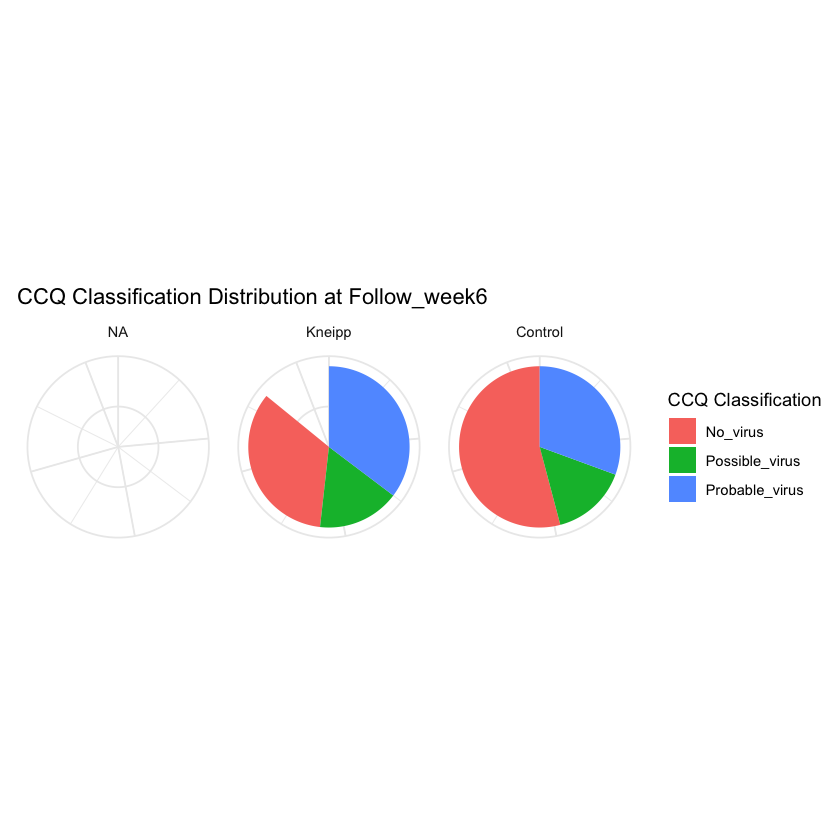

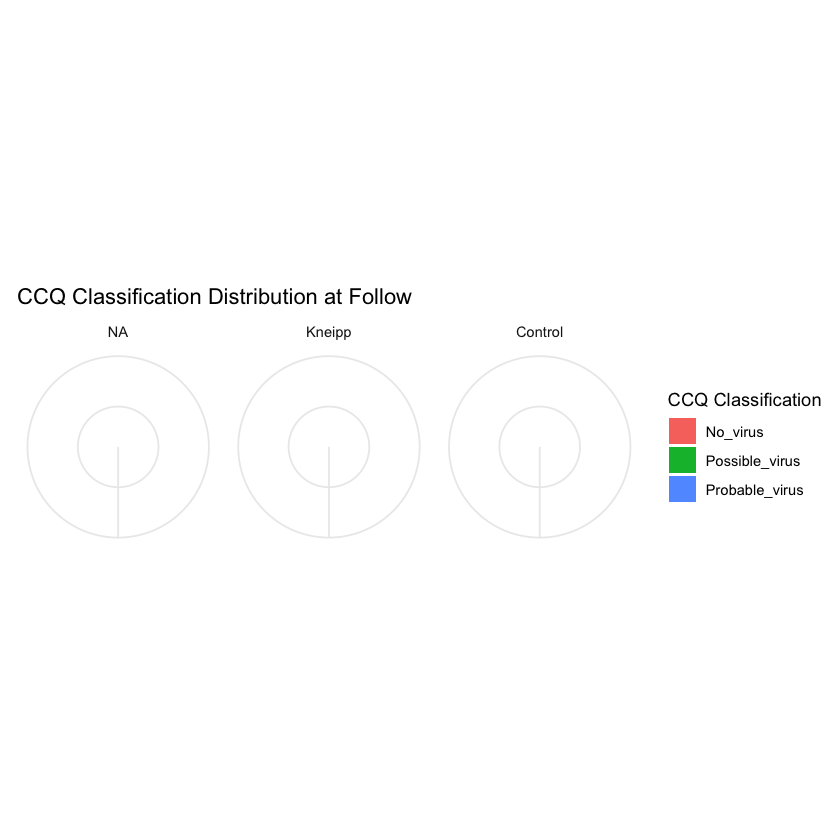

In [157]:
# Create and print pie charts for each time point separately
time_points <- levels(filtered_data$questionnaire_time_point)

for (time_point in time_points) {
  pie_data <- ccq_classification_data %>%
    filter(questionnaire_time_point == time_point)
  print(create_pie_chart(pie_data, time_point))
}


In [161]:
# Function to perform Fisher's exact test for each time point
perform_fisher_test <- function(data) {
  contingency_table <- table(data$Group, data$CCQ_classification)
  if (all(contingency_table == 0)) {
    return(NA)
  } else {
    fisher_test <- fisher.test(contingency_table)
    return(fisher_test$p.value)
  }
}

In [163]:
# Apply the test for each time point and store results
p_values <- sapply(time_points, function(time_point) {
  test_data <- filtered_data %>%
    filter(questionnaire_time_point == time_point)
  perform_fisher_test(test_data)
})

# Print p-values
p_values_df <- data.frame(Time_Point = time_points, P_Value = p_values)
print(p_values_df)

# Pairwise Fisher's exact test for Follow_week1
pairwise_fisher_test <- function(data, classification_levels) {
  results <- list()
  for (i in 1:(length(classification_levels) - 1)) {
    for (j in (i + 1):length(classification_levels)) {
      level1 <- classification_levels[i]
      level2 <- classification_levels[j]
      subset_data <- data %>%
        filter(CCQ_classification %in% c(level1, level2))
      contingency_table <- table(subset_data$Group, subset_data$CCQ_classification)
      fisher_test <- fisher.test(contingency_table)
      results[[paste(level1, "vs", level2)]] <- fisher_test$p.value
    }
  }
  return(results)
}

# Perform pairwise Fisher's exact test for Follow_week1
follow_week1_data <- filtered_data %>%
  filter(questionnaire_time_point == "Follow_week1")

pairwise_results <- pairwise_fisher_test(follow_week1_data, levels(follow_week1_data$CCQ_classification))
pairwise_results_df <- data.frame(Comparison = names(pairwise_results), P_Value = unlist(pairwise_results))
print(pairwise_results_df)

               Time_Point    P_Value
Follow_week1 Follow_week1 0.08078382
Follow_week2 Follow_week2 0.35501938
Follow_week3 Follow_week3 0.76948837
Follow_week4 Follow_week4 0.14882207
Follow_week5 Follow_week5 0.12627396
Follow_week6 Follow_week6 0.19409694
Follow             Follow         NA
                                                       Comparison    P_Value
No_virus vs Possible_virus             No_virus vs Possible_virus 0.62636441
No_virus vs Probable_virus             No_virus vs Probable_virus 0.08440976
Possible_virus vs Probable_virus Possible_virus vs Probable_virus 0.08909114


In [50]:
# frequency of gender per group
final_data %>% 
    filter(!is.na(gender)) %>%
    group_by(Group, gender) %>%
    dplyr::count() %>%
    mutate(percentage = n / sum(n) * 100)

Group,gender,n,percentage
<fct>,<fct>,<int>,<dbl>
NA,1,1,0.6097561
NA,2,2,1.2195122
Kneipp,1,41,25.0000000
Kneipp,2,34,20.7317073
Control,1,49,29.8780488
Control,2,37,22.5609756


In [51]:
# check if age has negative values and replace with NA
final_data <- final_data %>%
  mutate(age = ifelse(age < 0, NA, age))

In [55]:
# mean, sd, and range for both groups at questionnaire_time_point = Baseline
final_data %>%
  filter(!is.na(age)) %>%
  group_by(Group) %>%
  dplyr::summarise(
    sample_size = n(),
    mean_age = mean(age, na.rm = TRUE),
    sd_age = sd(age, na.rm = TRUE),
    min_age = min(age, na.rm = TRUE),
    max_age = max(age, na.rm = TRUE)
  )

Group,sample_size,mean_age,sd_age,min_age,max_age
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
NA,3,3.986311,1.485876,2.7707050,5.642710
Kneipp,75,4.414511,1.181428,1.7905544,6.433949
Control,85,4.253171,1.494786,0.9938398,8.295688


In [58]:
# age of acclimate to kindergarten
final_data %>%
    filter(!is.na(age_of_kindergarten_familiarisation)) %>%
    group_by(Group) %>%
    dplyr::summarise(
        sample_size = n(),
        mean_age_of_familiarisation = mean(age_of_kindergarten_familiarisation, na.rm = TRUE),
        sd_age_of_familiarisation = sd(age_of_kindergarten_familiarisation, na.rm = TRUE),
        min_age_of_familiarisation = min(age_of_kindergarten_familiarisation, na.rm = TRUE),
        max_age_of_familiarisation = max(age_of_kindergarten_familiarisation, na.rm = TRUE)
    )

Group,sample_size,mean_age_of_familiarisation,sd_age_of_familiarisation,min_age_of_familiarisation,max_age_of_familiarisation
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
NA,1,3.000000,NA,3,3
Kneipp,8,1.750000,0.8864053,1,3
Control,9,1.222222,0.6666667,1,3


In [60]:
final_data %>%
    filter(!is.na(weight), !is.na(height), !is.na(sleep_time_weekday), !is.na(wakeup_time_weekday), !is.na(sleep_time_weekend), !is.na(wakeup_time_weekend)) %>%
    mutate(
        sleep_duration_weekday = as.numeric(difftime(wakeup_time_weekday, sleep_time_weekday, units = "hours")),
        sleep_duration_weekend = as.numeric(difftime(wakeup_time_weekend, sleep_time_weekend, units = "hours"))
    ) %>%
    mutate(
        sleep_duration_weekday = ifelse(sleep_duration_weekday < 0, sleep_duration_weekday + 24, sleep_duration_weekday),
        sleep_duration_weekend = ifelse(sleep_duration_weekend < 0, sleep_duration_weekend + 24, sleep_duration_weekend)
    ) %>%
    group_by(Group) %>%
    dplyr::summarise(
        sample_size = n(),
        mean_weight = mean(weight, na.rm = TRUE),
        sd_weight = sd(weight, na.rm = TRUE),
        min_weight = min(weight, na.rm = TRUE),
        max_weight = max(weight, na.rm = TRUE),
        mean_height = mean(height, na.rm = TRUE),
        sd_height = sd(height, na.rm = TRUE),
        min_height = min(height, na.rm = TRUE),
        max_height = max(height, na.rm = TRUE),
        mean_sleep_duration_weekday = mean(sleep_duration_weekday, na.rm = TRUE),
        sd_sleep_duration_weekday = sd(sleep_duration_weekday, na.rm = TRUE),
        min_sleep_duration_weekday = min(sleep_duration_weekday, na.rm = TRUE),
        max_sleep_duration_weekday = max(sleep_duration_weekday, na.rm = TRUE),
        mean_sleep_duration_weekend = mean(sleep_duration_weekend, na.rm = TRUE),
        sd_sleep_duration_weekend = sd(sleep_duration_weekend, na.rm = TRUE),
        min_sleep_duration_weekend = min(sleep_duration_weekend, na.rm = TRUE),
        max_sleep_duration_weekend = max(sleep_duration_weekend, na.rm = TRUE)
    )

Group,sample_size,mean_weight,sd_weight,min_weight,max_weight,mean_height,sd_height,min_height,max_height,mean_sleep_duration_weekday,sd_sleep_duration_weekday,min_sleep_duration_weekday,max_sleep_duration_weekday,mean_sleep_duration_weekend,sd_sleep_duration_weekend,min_sleep_duration_weekend,max_sleep_duration_weekend
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,3,13.66667,2.081666,12,16,103.0000,10.816654,94,115,10.16667,0.5773503,9.5,10.5,10.50000,0.000000,10.5,10.5
Kneipp,75,17.48000,3.406512,9,30,106.4933,9.777765,80,125,11.27089,2.0540173,9.0,23.0,11.12222,2.010078,0.0,23.0
Control,85,17.77647,4.229647,10,35,105.0824,12.814809,63,130,11.14804,1.3468669,9.0,21.0,11.30000,1.348144,9.0,21.0


In [61]:
# frequency of vaccination_status per group
# 1 = all recommendations, 2 = partial recommendations, 3 = not vaccinated
final_data %>%
  filter(!is.na(vaccination_status)) %>%
  group_by(Group, vaccination_status) %>%
  dplyr::count() %>%
  mutate(percentage = n / sum(n) * 100)

Group,vaccination_status,n,percentage
<fct>,<fct>,<int>,<dbl>
NA,1,3,1.829268
Kneipp,1,66,40.243902
Kneipp,2,7,4.268293
Kneipp,3,2,1.219512
Control,1,78,47.560976
Control,2,8,4.878049


In [62]:
# frequency of pre_existing_diseases per group
final_data %>%
    filter(!is.na(pre_existing_diseases)) %>%
    group_by(Group, pre_existing_diseases) %>%
    dplyr::count() %>%
    mutate(percentage = n / sum(n) * 100)

Group,pre_existing_diseases,n,percentage
<fct>,<fct>,<int>,<dbl>
NA,1,2,1.2195122
NA,2,1,0.6097561
Kneipp,1,61,37.1951220
Kneipp,2,14,8.5365854
Control,1,77,46.9512195
Control,2,9,5.4878049


In [63]:
# frequency chronic_diseases per group
final_data %>%
    filter(!is.na(chronic_diseases)) %>%
    group_by(Group, chronic_diseases) %>%
    dplyr::count() %>%
    mutate(percentage = n / sum(n) * 100)

Group,chronic_diseases,n,percentage
<fct>,<fct>,<int>,<dbl>
NA,1,2,1.2195122
NA,2,1,0.6097561
Kneipp,1,67,40.8536585
Kneipp,2,8,4.8780488
Control,1,80,48.7804878
Control,2,6,3.6585366


In [64]:
# frequency of time_outside per group
final_data %>% 
    filter(!is.na(time_outside)) %>%
    group_by(Group, time_outside) %>%
    dplyr::count() %>%
    mutate(percentage = n / sum(n) * 100)

Group,time_outside,n,percentage
<fct>,<fct>,<int>,<dbl>
NA,4,3,1.8292683
Kneipp,1,1,0.6097561
Kneipp,2,30,18.2926829
Kneipp,3,33,20.1219512
Kneipp,4,11,6.7073171
Control,1,1,0.6097561
Control,2,23,14.0243902
Control,3,31,18.9024390
Control,4,31,18.9024390


In [66]:
# frequency of sport_and_club per group
final_data %>%
    filter(!is.na(sport_and_club)) %>%
    group_by(Group, sport_and_club) %>%
    dplyr::count() %>%
    mutate(percentage = n / sum(n) * 100)

Group,sport_and_club,n,percentage
<fct>,<fct>,<int>,<dbl>
NA,1,3,1.829268
Kneipp,1,37,22.560976
Kneipp,2,38,23.170732
Control,1,54,32.926829
Control,2,32,19.512195


In [67]:
# mean, sd, and range for adults in household per group
final_data %>%
    filter(!is.na(number_of_adults_in_household)) %>%
    group_by(Group) %>%
    dplyr::summarise(
        sample_size = n(),
        mean_adults_in_household = mean(number_of_adults_in_household, na.rm = TRUE),
        sd_adults_in_household = sd(number_of_adults_in_household, na.rm = TRUE),
        min_adults_in_household = min(number_of_adults_in_household, na.rm = TRUE),
        max_adults_in_household = max(number_of_adults_in_household, na.rm = TRUE)
    )

Group,sample_size,mean_adults_in_household,sd_adults_in_household,min_adults_in_household,max_adults_in_household
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
NA,6,2.000000,0.0000000,2,2
Kneipp,198,2.015152,0.6168305,1,6
Control,231,1.974026,0.3219786,1,3


In [69]:
# mean, sd, and range for children in household per group, age of oldest child, and age of youngest child
final_data %>%
    filter(!is.na(number_of_minors_in_household), !is.na(age_of_oldest_child_in_household), !is.na(age_of_youngest_child_in_household)) %>%
    group_by(Group) %>%
    dplyr::summarise(
        sample_size = n(),
        mean_children_in_household = mean(number_of_minors_in_household, na.rm = TRUE),
        sd_children_in_household = sd(number_of_minors_in_household, na.rm = TRUE),
        min_children_in_household = min(number_of_minors_in_household, na.rm = TRUE),
        max_children_in_household = max(number_of_minors_in_household, na.rm = TRUE),
        mean_age_of_oldest_child = mean(age_of_oldest_child_in_household, na.rm = TRUE),
        sd_age_of_oldest_child = sd(age_of_oldest_child_in_household, na.rm = TRUE),
        min_age_of_oldest_child = min(age_of_oldest_child_in_household, na.rm = TRUE),
        max_age_of_oldest_child = max(age_of_oldest_child_in_household, na.rm = TRUE),
        mean_age_of_youngest_child = mean(age_of_youngest_child_in_household, na.rm = TRUE),
        sd_age_of_youngest_child = sd(age_of_youngest_child_in_household, na.rm = TRUE),
        min_age_of_youngest_child = min(age_of_youngest_child_in_household, na.rm = TRUE),
        max_age_of_youngest_child = max(age_of_youngest_child_in_household, na.rm = TRUE)
    )

Group,sample_size,mean_children_in_household,sd_children_in_household,min_children_in_household,max_children_in_household,mean_age_of_oldest_child,sd_age_of_oldest_child,min_age_of_oldest_child,max_age_of_oldest_child,mean_age_of_youngest_child,sd_age_of_youngest_child,min_age_of_youngest_child,max_age_of_youngest_child
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,6,3.000000,0.000000,3,3,11.500000,1.643168,10,13,3.000000,0.000000,3,3
Kneipp,123,2.365854,0.532059,2,4,8.292683,3.515147,3,16,3.195122,1.571564,0,5
Control,150,2.240000,0.513966,1,3,7.740000,3.655335,2,17,2.760000,1.778620,0,7


In [70]:
# frequencies of marital status per group
final_data %>%
    filter(!is.na(family_status_parents)) %>%
    group_by(Group, family_status_parents) %>%
    dplyr::count() %>%
    mutate(percentage = n / sum(n) * 100)

Group,family_status_parents,n,percentage
<fct>,<fct>,<int>,<dbl>
NA,1,6,1.3793103
Kneipp,1,150,34.4827586
Kneipp,2,36,8.2758621
Kneipp,3,9,2.0689655
Kneipp,4,3,0.6896552
Control,1,141,32.4137931
Control,2,69,15.8620690
Control,3,9,2.0689655
Control,4,9,2.0689655


In [71]:
# frequencies of education parent1 per group
final_data %>%
    filter(!is.na(education_parent1)) %>%
    group_by(Group, education_parent1) %>%
    dplyr::count() %>%
    mutate(percentage = n / sum(n) * 100)

Group,education_parent1,n,percentage
<fct>,<fct>,<int>,<dbl>
NA,3,3,0.7042254
NA,5,3,0.7042254
Kneipp,1,3,0.7042254
Kneipp,2,15,3.5211268
Kneipp,3,54,12.6760563
Kneipp,4,114,26.7605634
Kneipp,5,3,0.7042254
Control,1,27,6.3380282
Control,2,30,7.0422535


In [72]:
# frequencies of education parent2 per group
final_data %>%
    filter(!is.na(education_parent2)) %>%
    group_by(Group, education_parent2) %>%
    dplyr::count() %>%
    mutate(percentage = n / sum(n) * 100)

Group,education_parent2,n,percentage
<fct>,<fct>,<int>,<dbl>
NA,1,3,0.7352941
NA,3,3,0.7352941
Kneipp,1,18,4.4117647
Kneipp,2,12,2.9411765
Kneipp,3,63,15.4411765
Kneipp,4,93,22.7941176
Control,1,33,8.0882353
Control,2,12,2.9411765
Control,3,57,13.9705882


In [73]:
# frequencies of occupation parent1 per group
final_data %>%
    filter(!is.na(occupation_parent1)) %>%
    group_by(Group, occupation_parent1) %>%
    dplyr::count() %>%
    mutate(percentage = n / sum(n) * 100)

Group,occupation_parent1,n,percentage
<fct>,<fct>,<int>,<dbl>
NA,7,3,0.6993007
NA,8,3,0.6993007
Kneipp,3,3,0.6993007
Kneipp,4,144,33.5664336
Kneipp,5,9,2.0979021
Kneipp,6,18,4.1958042
Kneipp,7,15,3.4965035
Kneipp,8,3,0.6993007
Control,1,6,1.3986014


In [74]:
# frequencies of occupation parent2 per group
final_data %>%
    filter(!is.na(occupation_parent2)) %>%
    group_by(Group, occupation_parent2) %>%
    dplyr::count() %>%
    mutate(percentage = n / sum(n) * 100)

Group,occupation_parent2,n,percentage
<fct>,<fct>,<int>,<dbl>
NA,4,6,1.459854
Kneipp,4,126,30.656934
Kneipp,5,12,2.919708
Kneipp,6,36,8.759124
Kneipp,7,12,2.919708
Kneipp,8,3,0.729927
Control,1,6,1.459854
Control,4,150,36.496350
Control,5,18,4.379562


In [75]:
# frequencies of household income per group
final_data %>%
    filter(!is.na(household_income)) %>%
    group_by(Group, household_income) %>%
    dplyr::count() %>%
    mutate(percentage = n / sum(n) * 100)

Group,household_income,n,percentage
<fct>,<fct>,<int>,<dbl>
Kneipp,6,9,2.4
Kneipp,7,15,4.0
Kneipp,8,3,0.8
Kneipp,9,21,5.6
Kneipp,10,30,8.0
Kneipp,11,99,26.4
Control,5,3,0.8
Control,6,9,2.4
Control,7,9,2.4


In [77]:
# frequencies of cold, bronichitis, lung inflammation, antibiotics use, and gastrointestinal infections last winter per group
final_data %>%
    filter(!is.na(cold_last_winter)) %>%
    group_by(Group, cold_last_winter) %>%
    dplyr::count() %>%
    mutate(percentage = n / sum(n) * 100)

final_data %>%
    filter(!is.na(bronchitis_last_winter)) %>%
    group_by(Group, bronchitis_last_winter) %>%
    dplyr::count() %>%
    mutate(percentage = n / sum(n) * 100)

final_data %>%
    filter(!is.na(lung_inflammation_last_winter)) %>%
    group_by(Group, lung_inflammation_last_winter) %>%
    dplyr::count() %>%
    mutate(percentage = n / sum(n) * 100)

final_data %>%
    filter(!is.na(antibiotics_last_winter)) %>%
    group_by(Group, antibiotics_last_winter) %>%
    dplyr::count() %>%
    mutate(percentage = n / sum(n) * 100)

final_data %>%
    filter(!is.na(gastrointestinal_infections_last_winter)) %>%
    group_by(Group, gastrointestinal_infections_last_winter) %>%
    dplyr::count() %>%
    mutate(percentage = n / sum(n) * 100)

Group,cold_last_winter,n,percentage
<fct>,<dbl>,<int>,<dbl>
NA,2,3,1.818182
Kneipp,1,10,6.060606
Kneipp,2,66,40.000000
Control,1,8,4.848485
Control,2,78,47.272727


Group,bronchitis_last_winter,n,percentage
<fct>,<dbl>,<int>,<dbl>
NA,1,2,1.2121212
NA,2,1,0.6060606
Kneipp,1,65,39.3939394
Kneipp,2,11,6.6666667
Control,1,76,46.0606061
Control,2,10,6.0606061


Group,lung_inflammation_last_winter,n,percentage
<fct>,<dbl>,<int>,<dbl>
NA,1,3,1.8181818
Kneipp,1,74,44.8484848
Kneipp,2,2,1.2121212
Control,1,85,51.5151515
Control,2,1,0.6060606


Group,antibiotics_last_winter,n,percentage
<fct>,<dbl>,<int>,<dbl>
NA,1,3,1.818182
Kneipp,1,62,37.575758
Kneipp,2,14,8.484848
Control,1,79,47.878788
Control,2,7,4.242424


Group,gastrointestinal_infections_last_winter,n,percentage
<fct>,<dbl>,<int>,<dbl>
NA,1,3,1.818182
Kneipp,1,57,34.545455
Kneipp,2,19,11.515152
Control,1,64,38.787879
Control,2,22,13.333333


In [104]:
# Function to create contingency table
create_contingency_table <- function(data, variable) {
  data %>%
    filter(!is.na({{ variable }})) %>%
    group_by(Group, {{ variable }}) %>%
    dplyr::count() %>%
    ungroup() %>%
    spread(key = {{ variable }}, value = n, fill = 0)
}

In [105]:
# Create contingency tables for each health outcome
cold_table <- create_contingency_table(final_data, cold_last_winter)
bronchitis_table <- create_contingency_table(final_data, bronchitis_last_winter)
lung_inflammation_table <- create_contingency_table(final_data, lung_inflammation_last_winter)
antibiotics_table <- create_contingency_table(final_data, antibiotics_last_winter)
gastrointestinal_table <- create_contingency_table(final_data, gastrointestinal_infections_last_winter)


In [106]:
# Function to perform chi-square test and check assumptions
perform_test <- function(contingency_table) {
  chisq_test <- chisq.test(contingency_table[-1])
  expected_frequencies <- chisq_test$expected
  min_expected <- min(expected_frequencies)
  if (min_expected < 5) {
    fisher_test <- fisher.test(contingency_table[-1])
    return(list(test = "Fisher's Exact Test", statistic = fisher_test$estimate, df = NA, p_value = fisher_test$p.value))
  } else {
    return(list(test = "Chi-Squared Test", statistic = chisq_test$statistic, df = chisq_test$parameter, p_value = chisq_test$p.value))
  }
}

In [113]:
# Perform tests and store results
cold_result <- perform_test(cold_table)
bronchitis_result <- perform_test(bronchitis_table)
lung_inflammation_result <- perform_test(lung_inflammation_table)
antibiotics_result <- perform_test(antibiotics_table)
gastrointestinal_result <- perform_test(gastrointestinal_table)
gastrointestinal_result

Warning message in stats::chisq.test(x, y, ...):
"Chi-squared approximation may be incorrect"
Warning message in stats::chisq.test(x, y, ...):
"Chi-squared approximation may be incorrect"
Warning message in stats::chisq.test(x, y, ...):
"Chi-squared approximation may be incorrect"
Warning message in stats::chisq.test(x, y, ...):
"Chi-squared approximation may be incorrect"
Warning message in stats::chisq.test(x, y, ...):
"Chi-squared approximation may be incorrect"


$test
[1] "Fisher's Exact Test"

$statistic
NULL

$df
[1] NA

$p_value
[1] 0.9387201

In [82]:
head(final_data)

serial_ID,additional_children...3,zipcode,number_of_adults_in_household,number_of_minors_in_household,age_of_oldest_child_in_household,age_of_youngest_child_in_household,family_status_parents,parent1,parent2,...,sickdays_infections_last_winter,age_of_kindergarten_familiarisation,sickdays_last_winter,additional_children...41,sickdays_due_to_illness,sickdays_due_to_other_reasons,CCQ_score,CCQ_classification,age,Group
<chr>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,...,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>
12TQZBYTL5,1,8,2,1,NA,NA,2,1,2,...,NA,NA,NA,NA,NA,NA,4.555556,NA,2.516085,Control
14XUXCQFM3,1,130,2,2,5,2,1,1,2,...,NA,NA,NA,NA,NA,NA,4.055556,NA,5.262149,Control
171KGMFMMF,1,NA,2,1,NA,NA,1,1,2,...,1,NA,NA,NA,NA,NA,3.333333,NA,4.134155,Kneipp
1KGW5NWVQW,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,0.000000,NA,NA,Kneipp
1QQ55RFXLT,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,0.000000,NA,NA,Kneipp
1SXEBNF5YZ,1,151,2,2,6,2,1,1,2,...,1,NA,NA,NA,NA,NA,4.000000,NA,6.099932,Control


In [98]:
library(car)
# Exclude 'NA' levels in Group and ensure CCQ_score is numeric
filtered_data <- final_data %>%
  filter(Group %in% c("Kneipp", "Control")) %>%
  mutate(CCQ_score = as.numeric(CCQ_score))

# Check normality with Shapiro-Wilk test
shapiro_test_kneipp <- shapiro.test(filtered_data$CCQ_score[filtered_data$Group == "Kneipp"])
shapiro_test_control <- shapiro.test(filtered_data$CCQ_score[filtered_data$Group == "Control"])

# Print Shapiro-Wilk test results
print(shapiro_test_kneipp)
print(shapiro_test_control)

# Check homogeneity of variances with Levene's test
levene_test <- car::leveneTest(CCQ_score ~ Group, data = filtered_data)
print(levene_test)

# Perform Mann-Whitney U test since data is not normally distributed
mann_whitney_test <- wilcox.test(CCQ_score ~ Group, data = filtered_data)

# Print the Mann-Whitney U test result
print(mann_whitney_test)

# Calculate medians and IQRs
medians <- filtered_data %>%
  dplyr::group_by(Group) %>%
  dplyr::summarize(median = median(CCQ_score, na.rm = TRUE),
            IQR = IQR(CCQ_score, na.rm = TRUE))

print(medians)


	Shapiro-Wilk normality test

data:  filtered_data$CCQ_score[filtered_data$Group == "Kneipp"]
W = 0.81521, p-value = 4.665e-15


	Shapiro-Wilk normality test

data:  filtered_data$CCQ_score[filtered_data$Group == "Control"]
W = 0.81202, p-value = 3.23e-16

Levene's Test for Homogeneity of Variance (center = median)
       Df F value Pr(>F)
group   1  0.0162 0.8987
      445               

	Wilcoxon rank sum test with continuity correction

data:  CCQ_score by Group
W = 24606, p-value = 0.838
alternative hypothesis: true location shift is not equal to 0

# A tibble: 2 x 3
  Group   median   IQR
  <fct>    <dbl> <dbl>
1 Kneipp    4.69  1.06
2 Control   4.61  1.61


Warning message:
"Removed 33 rows containing non-finite outside the scale range
(`stat_boxplot()`)."


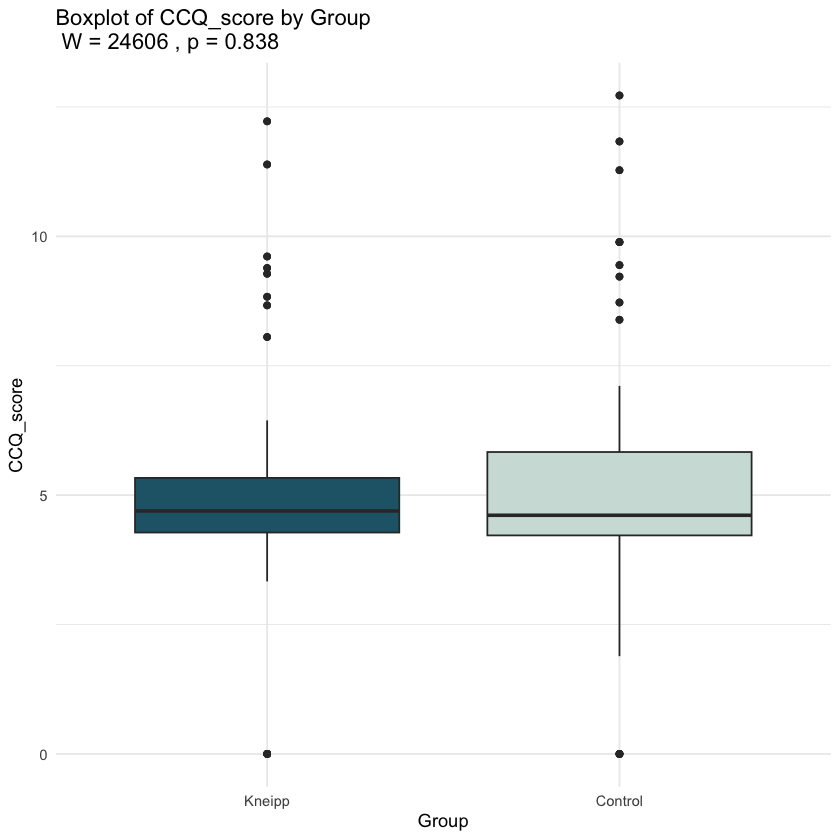

In [94]:
# Create the boxplot with the Mann-Whitney U test result
ggplot(filtered_data, aes(x = Group, y = CCQ_score, fill = Group)) +
  geom_boxplot() +
  labs(title = paste("Boxplot of CCQ_score by Group\n",
                     "W =", round(mann_whitney_test$statistic, 2),
                     ", p =", round(mann_whitney_test$p.value, 4)),
       x = "Group",
       y = "CCQ_score") +
  theme_minimal() +
  scale_fill_manual(values = c("#236477", "#cfdfda"), labels = c("Kneipp", "Control")) +
  theme(legend.position = "none")

In [100]:
# Perform two-way ANOVA
anova_result <- aov(CCQ_score ~ Group * gender, data = filtered_data)

# Print the ANOVA result
summary(anova_result)

              Df Sum Sq Mean Sq F value Pr(>F)
Group          1    0.0   0.048   0.008  0.928
gender         1    8.0   7.961   1.381  0.242
Group:gender   1    1.9   1.892   0.328  0.568
Residuals    156  899.2   5.764               
320 observations deleted due to missingness

In [87]:
# Ensure sickdays_last_winter and age are numeric
filtered_data <- filtered_data %>%
  mutate(sickdays_last_winter = as.numeric(sickdays_last_winter),
         age = as.numeric(age))

# Calculate correlation between CCQ_score and sickdays_last_winter
correlation_sickdays <- cor(filtered_data$CCQ_score, filtered_data$sickdays_last_winter, use = "complete.obs")

# Calculate correlation between CCQ_score and age
correlation_age <- cor(filtered_data$CCQ_score, filtered_data$age, use = "complete.obs")

# Print the correlation results
cat("Correlation between CCQ_score and sickdays_last_winter: ", correlation_sickdays, "\n")
cat("Correlation between CCQ_score and age: ", correlation_age, "\n")

Correlation between CCQ_score and sickdays_last_winter:  -0.1743254 
Correlation between CCQ_score and age:  -0.05744913 


In [ ]:
# calculate a CCQ_class variable based on CCQ_score
# 

In [ ]:
# Increase the width and height of the plot
options(repr.plot.width = 20, repr.plot.height = 30)

# Save the original plot size options
original_width <- getOption("repr.plot.width")
original_height <- getOption("repr.plot.height")

# Increase the base font size
theme_set(theme_bw(base_size = 20))

In [ ]:
colnames(sosci_clean)

In [ ]:
# create histogram of 